In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Reddit dataset
reddit_data = pd.read_csv(r"D:\Downloads\2_the-reddit-dataset-dataset-posts.csv", nrows=100)

# Function for text cleaning and pre-processing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove HTML tags if present
    text = re.sub('<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'title' column
reddit_data['clean_title'] = reddit_data['title'].apply(preprocess_text)

# Apply preprocessing to the 'selftext' column
reddit_data['clean_selftext'] = reddit_data['selftext'].apply(lambda x: preprocess_text(str(x)))

# Additional preprocessing steps
# Remove duplicate posts/comments
reddit_data.drop_duplicates(subset=['clean_title', 'clean_selftext'], inplace=True)

# Remove posts/comments with missing or irrelevant content
reddit_data.dropna(subset=['clean_title', 'clean_selftext'], inplace=True)

# Save preprocessed data to a new CSV file
reddit_data.to_csv('preprocessed_reddit_data.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Nodes:

# Posts: Each post in the dataset is represented as a node. Posts contain information such as the post ID, title, self-text, etc.
# Subreddits: Subreddits to which the posts belong are represented as nodes. Each subreddit has its own name.
# Domains: Domains from which the posts originate are represented as nodes. Domains represent the source of the content.
# Scores: Scores associated with posts are represented as nodes. Scores represent the popularity or engagement level of the posts.

# Edges:

# posted_in: Directed edges from posts to subreddits represent the relationship between posts and the subreddits they are posted in.
# posted_on: Directed edges from posts to domains represent the relationship between posts and the domains they are posted on.
# has_score: Directed edges from posts to scores represent the relationship between posts and their scores.

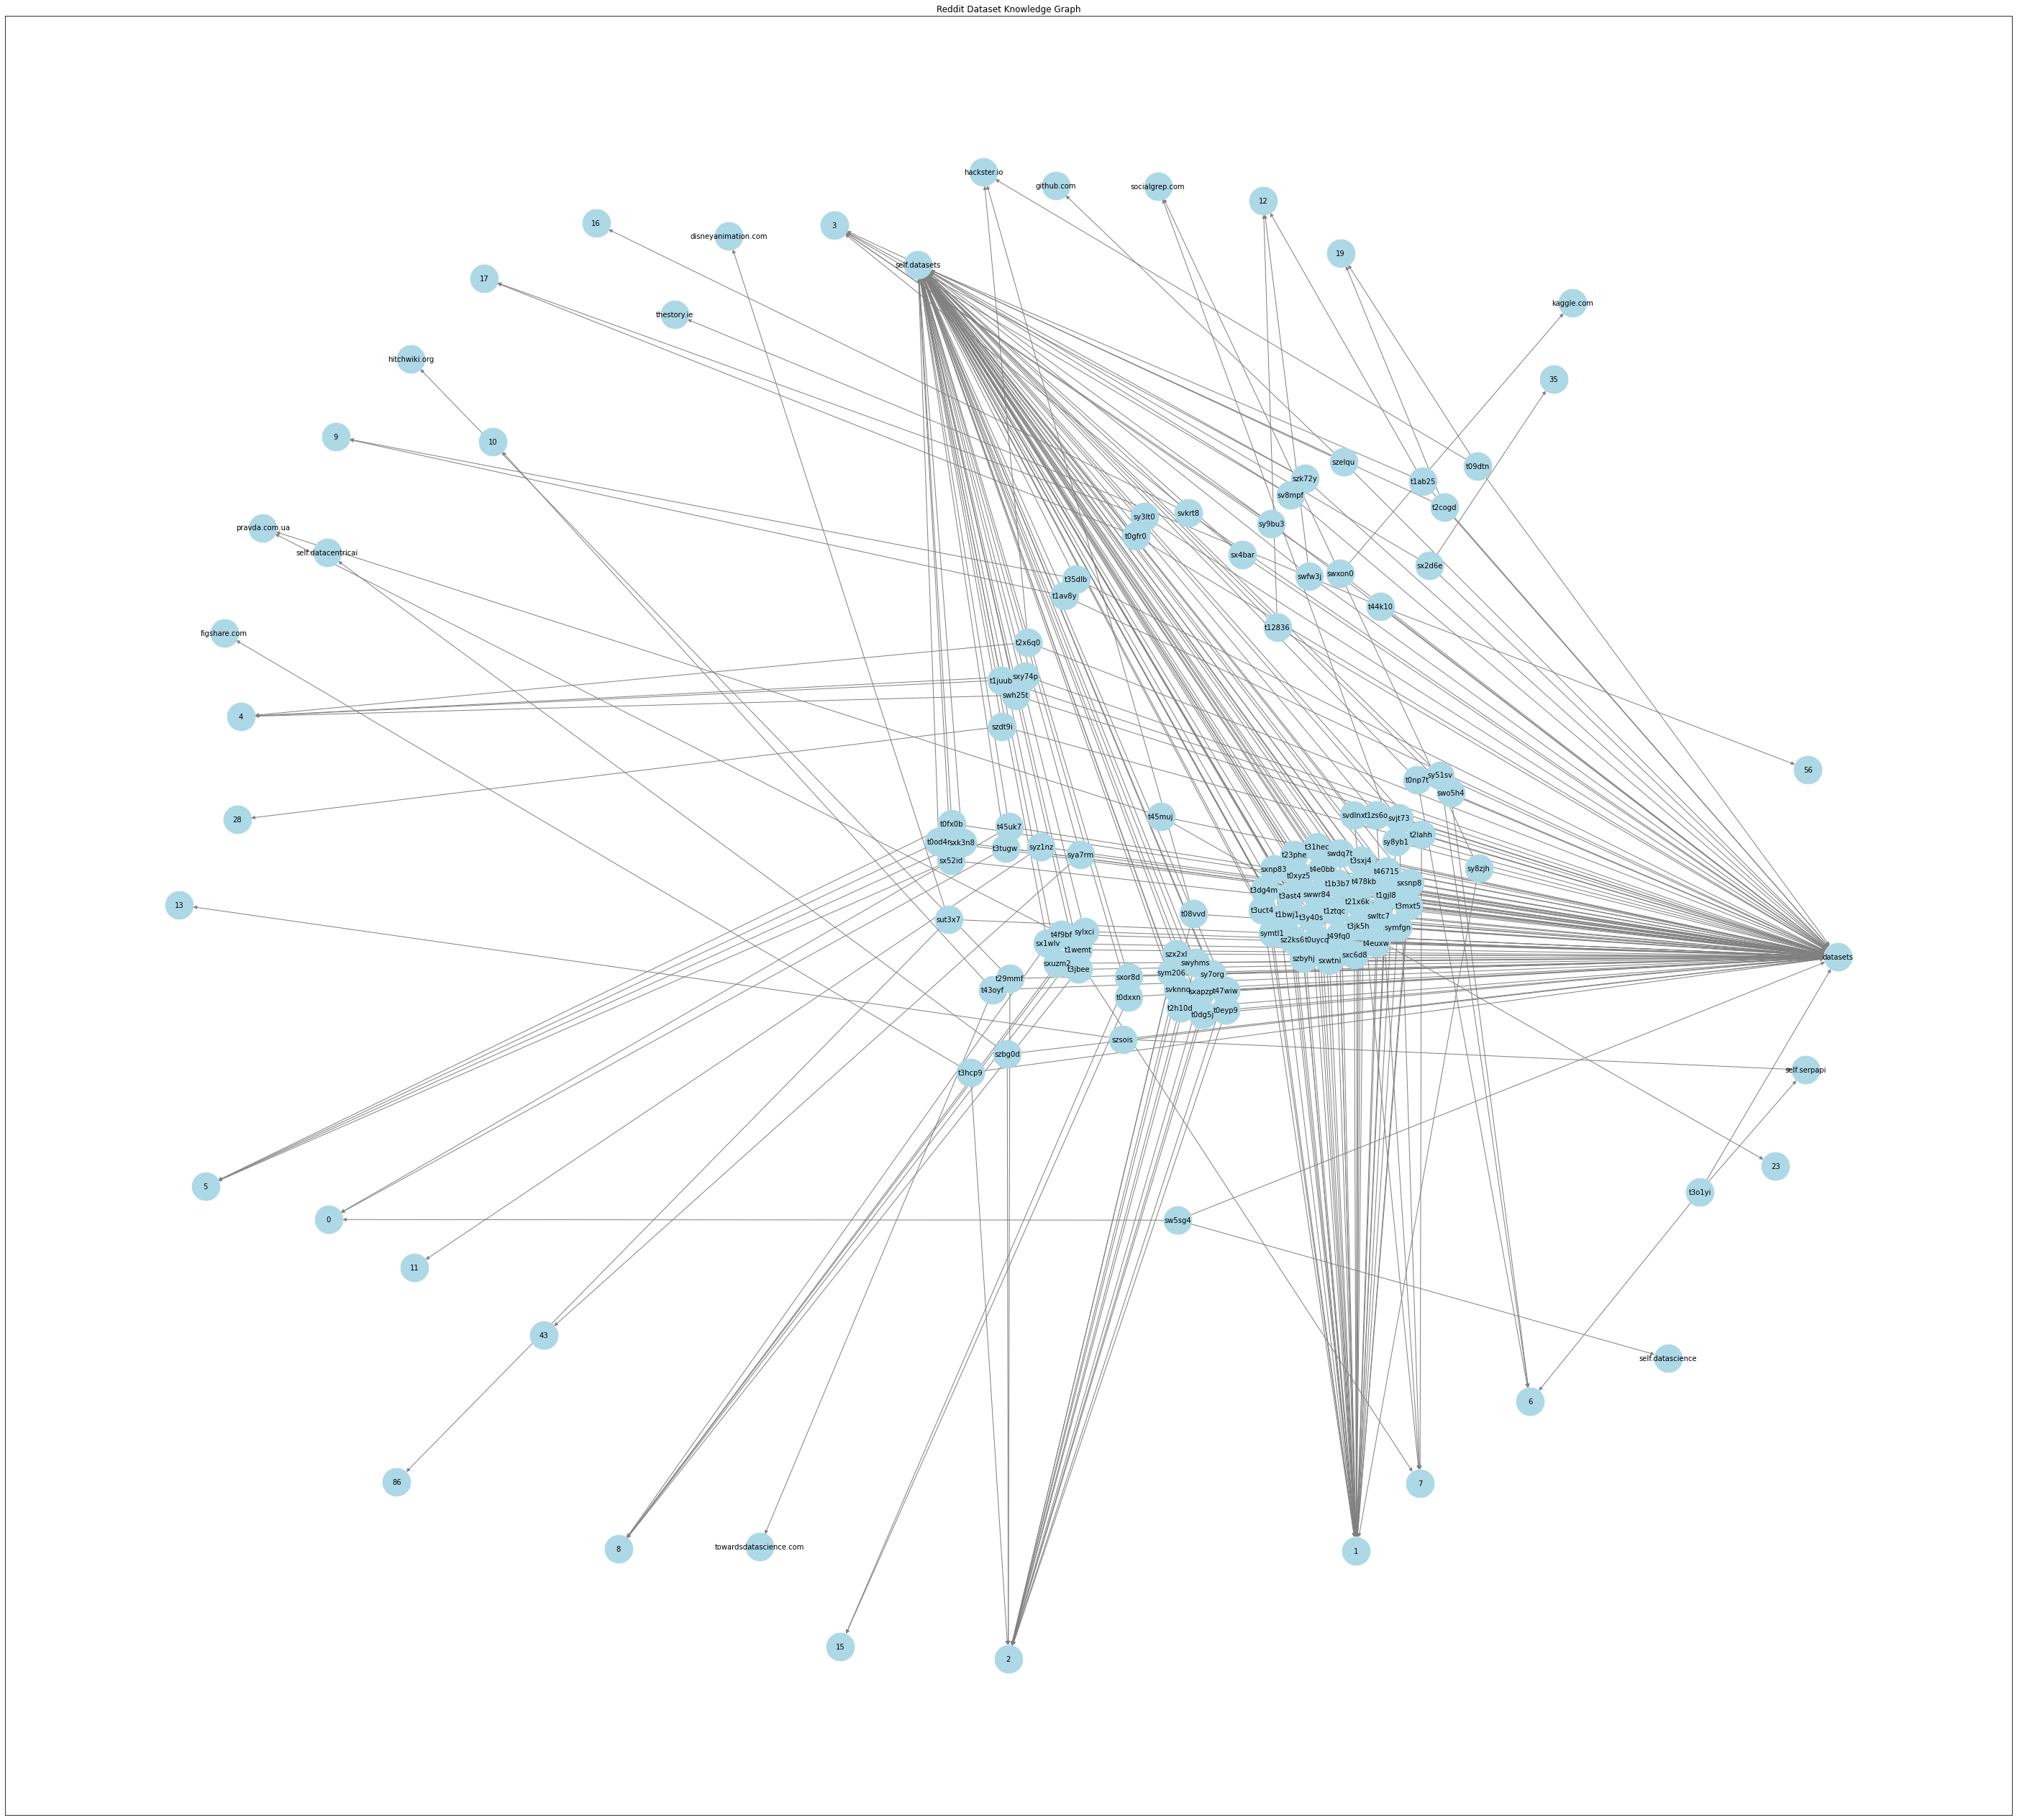

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load preprocessed Reddit dataset
reddit_data = pd.read_csv('preprocessed_reddit_data.csv')

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in reddit_data.iterrows():
    post_id = row['id']
    subreddit_name = row['subreddit.name']
    domain = row['domain']
    score = row['score']
    
    # Add nodes for post, subreddit, and domain
    G.add_node(post_id, type='post')
    G.add_node(subreddit_name, type='subreddit')
    G.add_node(domain, type='domain')
    
    # Add edges between post and subreddit, post and domain, and post and score
    G.add_edge(post_id, subreddit_name, relationship='posted_in')
    G.add_edge(post_id, domain, relationship='posted_on')
    G.add_edge(post_id, str(score), relationship='has_score')

# Draw the knowledge graph
plt.figure(figsize=(50, 46))
pos = nx.spring_layout(G, k=0.3)  # Adjust k to adjust spacing between nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, edge_color='gray', width=1, arrowsize=10)
plt.title('Reddit Dataset Knowledge Graph')
plt.show()

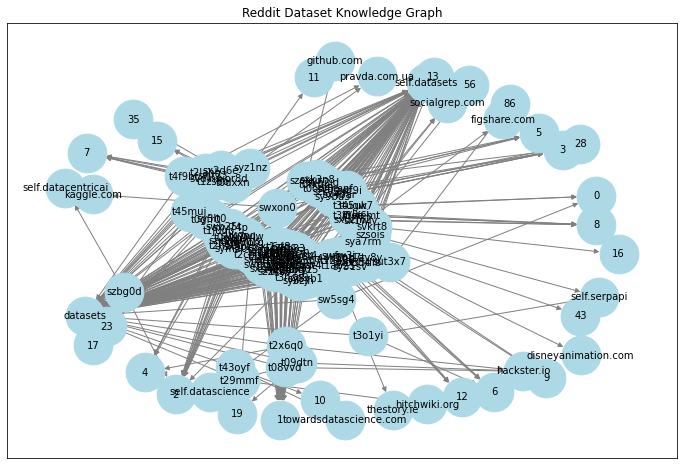

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load preprocessed Reddit dataset
reddit_data = pd.read_csv('preprocessed_reddit_data.csv')

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in reddit_data.iterrows():
    post_id = row['id']
    subreddit_name = row['subreddit.name']
    domain = row['domain']
    score = row['score']
    
    # Add nodes for post, subreddit, and domain
    G.add_node(post_id, type='post')
    G.add_node(subreddit_name, type='subreddit')
    G.add_node(domain, type='domain')
    
    # Add edges between post and subreddit, post and domain, and post and score
    G.add_edge(post_id, subreddit_name, relationship='posted_in')
    G.add_edge(post_id, domain, relationship='posted_on')
    G.add_edge(post_id, str(score), relationship='has_score')

# Draw the knowledge graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  # Adjust k to adjust spacing between nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, edge_color='gray', width=1, arrowsize=10)
plt.title('Reddit Dataset Knowledge Graph')
plt.show()


In [ ]:
#PERKG

In [ ]:
# represent the "Big Five" personality traits (Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism) in the knowledge graph. We will assign each post to a particular personality trait based on its content or characteristics.

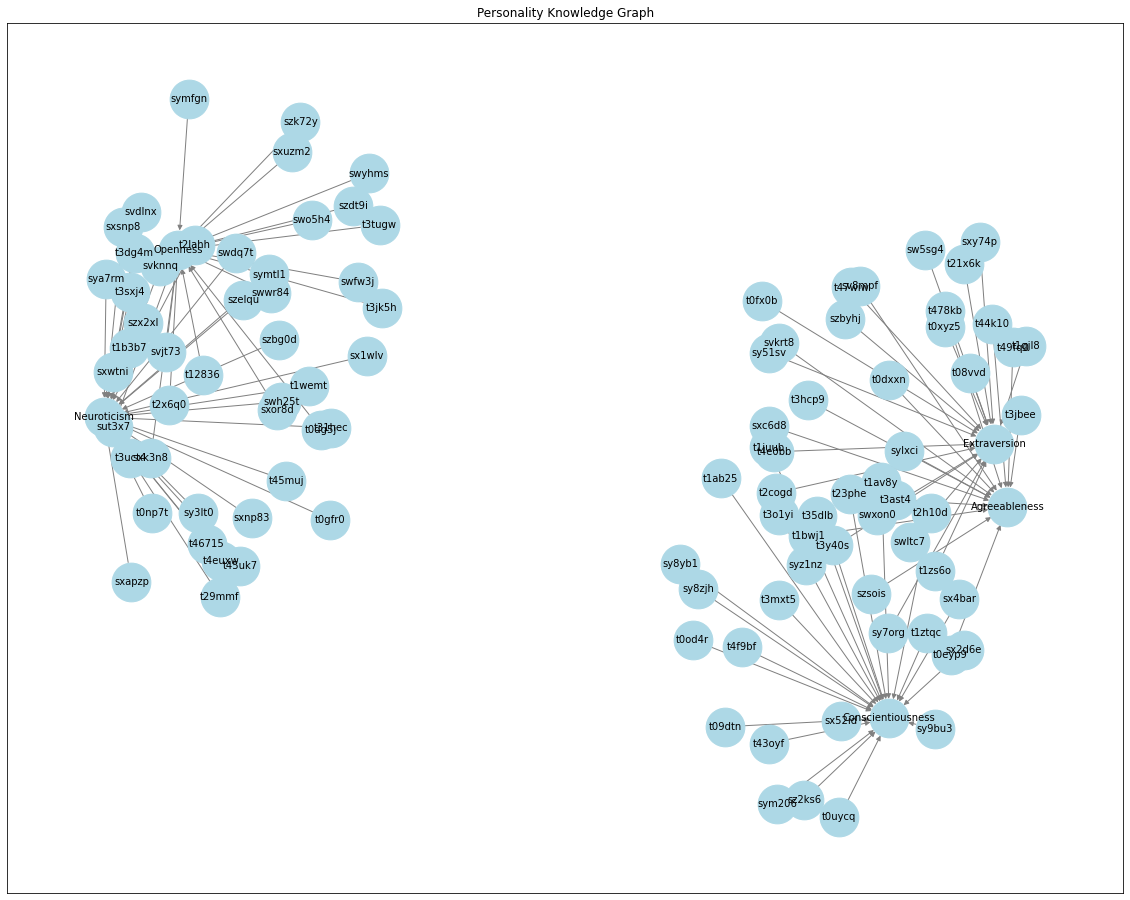

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load preprocessed Reddit dataset
reddit_data = pd.read_csv('preprocessed_reddit_data.csv')

# Create a directed graph
G = nx.DiGraph()

# Define personality traits (Big Five)
personality_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

# Add personality traits as nodes to the graph
for trait in personality_traits:
    G.add_node(trait, type='personality_trait')

# Assign posts to personality traits (for demonstration purposes, let's randomly assign posts to traits)
import random
for index, row in reddit_data.iterrows():
    post_id = row['id']
    post_title = row['title']
    post_text = row['selftext']
    
    # Randomly assign a personality trait to each post
    assigned_trait = random.choice(personality_traits)
    
    # Add edges between post and assigned personality trait
    G.add_node(post_id, type='post')
    G.add_edge(post_id, assigned_trait, relationship='belongs_to')

# Draw the knowledge graph
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, k=0.3)  # Adjust k to adjust spacing between nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, edge_color='gray', width=1, arrowsize=10)
plt.title('Personality Knowledge Graph')
plt.show()


In [ ]:
# Create a Knowledge Graph: Start by building a knowledge graph from text data. 
# This involves matching concepts in the input text with entries in a knowledge base, such as DBpedia, 
# to create a set of interlinked descriptions of concepts.

In [18]:
# To create a knowledge graph from text data by matching concepts in the input text with entries in a knowledge base like DBpedia, you can follow these steps:

# Extract Concepts: Use a natural language processing (NLP) library like SpaCy to extract concepts from the input text.
# Query Knowledge Base: Use the extracted concepts to query a knowledge base (e.g., DBpedia) to retrieve additional information about those concepts.
# Build Graph: Construct a graph where nodes represent concepts and edges represent relationships between them.
# Visualize: Visualize the knowledge graph for better understanding.

# code adds an edge between every pair of concepts that appear in the
# same Reddit post, except for self-referential edges and duplicate edges. 

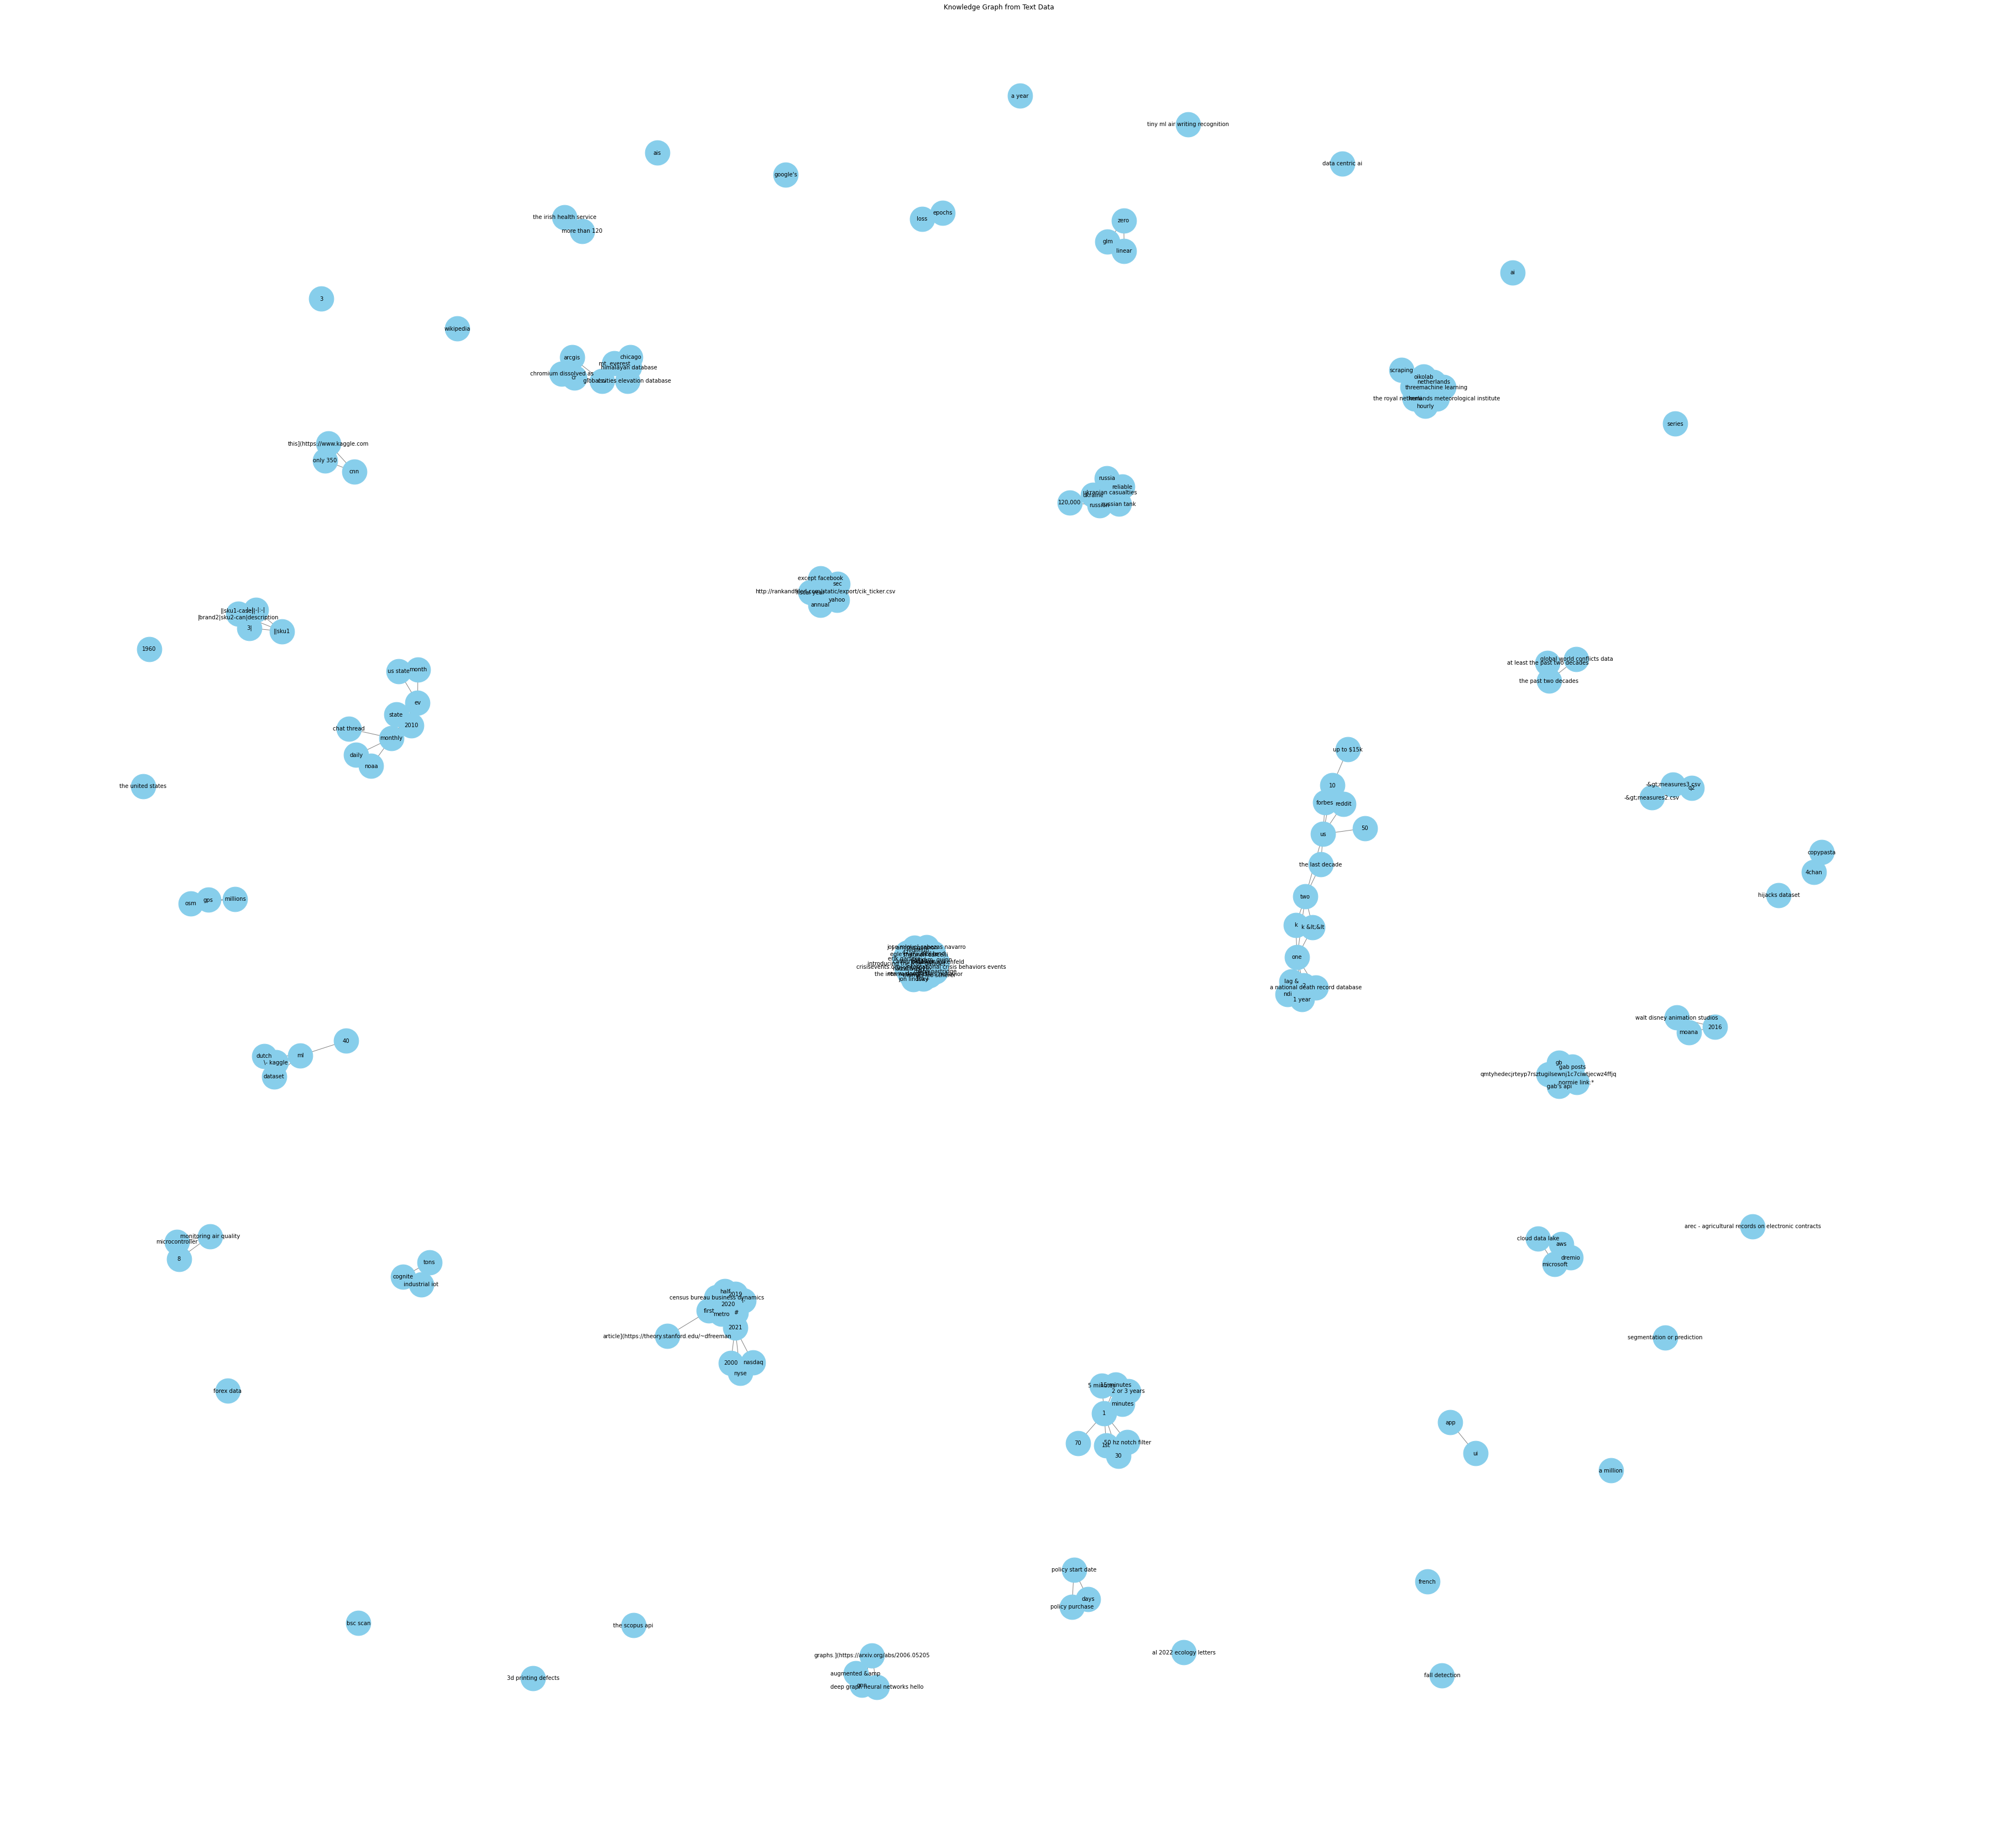

In [17]:
import spacy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to extract concepts from text using SpaCy
def extract_concepts(text):
    doc = nlp(text)
    concepts = [ent.text.lower() for ent in doc.ents]
    return concepts

# Function to build a knowledge graph
def build_knowledge_graph(data):
    G = nx.Graph()
    for index, row in data.iterrows():
        # Concatenate title and selftext, handling NaN values
        title = str(row['title']) if isinstance(row['title'], str) else ''
        selftext = str(row['selftext']) if isinstance(row['selftext'], str) else ''
        text = title + ' ' + selftext
        
        concepts = extract_concepts(text)
        for concept1 in concepts:
            if not G.has_node(concept1):
                G.add_node(concept1)
            for concept2 in concepts:
                if concept1 != concept2 and not G.has_node(concept2):
                    G.add_node(concept2)
                if concept1 != concept2 and not G.has_edge(concept1, concept2):
                    G.add_edge(concept1, concept2)
    return G

# Load the dataset
data = pd.read_csv("preprocessed_reddit_data.csv")

# Build the knowledge graph
knowledge_graph = build_knowledge_graph(data)

# Visualize the knowledge graph
plt.figure(figsize=(50, 46))
pos = nx.spring_layout(knowledge_graph)
nx.draw(knowledge_graph, pos, with_labels=True, node_size=2000, font_size=10, node_color='skyblue', edge_color='gray', linewidths=1, arrowsize=20)
plt.title('Knowledge Graph from Text Data')
plt.show()


In [ ]:
# Embed the Knowledge Graph: Convert the enriched knowledge graph into an embedding matrix. 
# This step transforms the graph into a numerical format that can be fed into machine learning models.

In [28]:
import pandas as pd
import networkx as nx
from node2vec import Node2Vec

# Convert the knowledge graph to a NetworkX graph object
knowledge_graph = nx.from_pandas_edgelist(data, source='id', target='subreddit.id')

# Check if the graph is a NetworkX graph object
if not isinstance(knowledge_graph, nx.Graph):
    # If not, convert it to a NetworkX graph object
    knowledge_graph = nx.Graph(knowledge_graph)


# Generate node embeddings using node2vec
p = 1  # Return parameter
q = 0.5  # In-out parameter
dimensions = 128  # Dimensionality of embeddings
num_walks = 10  # Number of walks per node
walk_length = 80  # Length of each random walk

# Initialize node2vec
node2vec = Node2Vec(
    knowledge_graph,
    dimensions=dimensions,
    walk_length=walk_length,
    num_walks=num_walks,
    p=p,
    q=q,
    workers=4,  # Number of parallel workers
    quiet=False  # Print progress messages
)

# Embed nodes
node_embeddings = node2vec.fit(window=10, min_count=1, batch_words=4)

import numpy as np

# Access the embeddings
for node in knowledge_graph.nodes():
    # Check if the node is in the vocabulary of the embeddings
    if node in node_embeddings.wv:
        embedding = node_embeddings.wv[node]
        print(f"Node: {node}, Embedding: {embedding}")
    else:
        print(f"No embedding found for node: {node}")



Computing transition probabilities:   0%|          | 0/101 [00:00<?, ?it/s]

Node: t4f9bf, Embedding: [ 0.06374728 -0.0295921   0.03810089  0.17742555  0.04741485  0.07993883
 -0.03434543  0.17233343 -0.05764711  0.03870608  0.1794838   0.06229339
 -0.03738548  0.00044332 -0.03214066  0.09303166 -0.04465129  0.02548941
 -0.09311148 -0.09567931  0.07156115  0.05605031 -0.04325339 -0.01007698
  0.02585561  0.0291749  -0.05499663  0.08653475 -0.01986339 -0.02153787
 -0.03730321  0.02563161  0.10638513 -0.05524879 -0.0138936   0.0373551
  0.09714592 -0.06164004  0.02101219 -0.00797558 -0.13925385  0.08494659
 -0.06786975  0.0352906   0.04801838  0.03567865 -0.09794279  0.14387003
 -0.02008223  0.12290066 -0.02611872  0.1262444  -0.00094269 -0.00376876
  0.08597264 -0.03482889  0.08976283  0.04218471 -0.06193593  0.05118082
 -0.14264728 -0.10461394  0.00901133 -0.00468201  0.00160263 -0.01774841
  0.05655085  0.01126713 -0.07103877  0.01622691  0.0317461   0.00790871
 -0.00662055 -0.16634478 -0.00050985 -0.13332443  0.07392471  0.03176774
 -0.13511735  0.06872979  0

In [ ]:
# Predict Personality Traits: Use deep learning models to predict personality traits based on the embedding matrix. 
#     The models can include convolutional neural networks (CNN), recurrent neural networks (RNN), long short-term memory (LSTM), and bidirectional LSTM (BiLSTM).

In [45]:
import pandas as pd

# Load the dataset
dt = pd.read_csv("preprocessed_reddit_data.csv")

# Display the column names
print(dt.columns)


Index(['index', 'type', 'id', 'subreddit.id', 'subreddit.name',
       'subreddit.nsfw', 'created_utc', 'permalink', 'domain', 'url',
       'selftext', 'title', 'score', 'clean_title', 'clean_selftext'],
      dtype='object')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Convolutional Neural Network (CNN) Model
cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjust output layer based on the number of personality traits
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2000/2000 [==============================] - 15s 7ms/step - loss: 1.0231 - accuracy: 0.6265 - val_loss: 0.8123 - val_accuracy: 0.7115
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7058 - accuracy: 0.7495 - val_loss: 0.6821 - val_accuracy: 0.7582
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6202 - accuracy: 0.7839 - val_loss: 0.6412 - val_accuracy: 0.7735
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5668 - accuracy: 0.8035 - val_loss: 0.6198 - val_accuracy: 0.7861
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5234 - accuracy: 0.8213 - val_loss: 0.5996 - val_accuracy: 0.7932
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4867 - accuracy: 0.8348 - val_loss: 0.5861 - val_accuracy: 0.8017
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4554 - accuracy: 0.8463 - val_loss: 0.5798 - val_a

In [63]:
# Recurrent Neural Network (RNN) Model
rnn_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjust output layer based on the number of personality traits
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.9593 - accuracy: 0.6308 - val_loss: 0.8267 - val_accuracy: 0.7105
Epoch 2/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.7216 - accuracy: 0.7392 - val_loss: 0.7149 - val_accuracy: 0.7508
Epoch 3/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.6397 - accuracy: 0.7765 - val_loss: 0.6664 - val_accuracy: 0.7702
Epoch 4/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.5933 - accuracy: 0.7947 - val_loss: 0.6468 - val_accuracy: 0.7785
Epoch 5/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.5601 - accuracy: 0.8086 - val_loss: 0.6373 - val_accuracy: 0.7826
Epoch 6/10
2000/2000 [==============================] - 33s 17ms/step - loss: 0.5332 - accuracy: 0.8193 - val_loss: 0.6292 - val_accuracy: 0.7857
Epoch 7/10
2000/2000 [==============================] - 33s 17ms/step - loss: 0.5100 - accuracy: 0.8277 - val_loss: 0.6302 

In [64]:
# Long Short-Term Memory (LSTM) Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjust output layer based on the number of personality traits
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2000/2000 [==============================] - 45s 20ms/step - loss: 0.9658 - accuracy: 0.6301 - val_loss: 0.8271 - val_accuracy: 0.7104
Epoch 2/10
2000/2000 [==============================] - 44s 20ms/step - loss: 0.7229 - accuracy: 0.7391 - val_loss: 0.7145 - val_accuracy: 0.7507
Epoch 3/10
2000/2000 [==============================] - 43s 21ms/step - loss: 0.6392 - accuracy: 0.7767 - val_loss: 0.6682 - val_accuracy: 0.7698
Epoch 4/10
2000/2000 [==============================] - 43s 21ms/step - loss: 0.5922 - accuracy: 0.7948 - val_loss: 0.6480 - val_accuracy: 0.7778
Epoch 5/10
2000/2000 [==============================] - 43s 20ms/step - loss: 0.5534 - accuracy: 0.8101 - val_loss: 0.6267 - val_accuracy: 0.7901
Epoch 6/10
2000/2000 [==============================] - 43s 21ms/step - loss: 0.5207 - accuracy: 0.8234 - val_loss: 0.6153 - val_accuracy: 0.7935
Epoch 7/10
2000/2000 [==============================] - 43s 21ms/step - loss: 0.4929 - accuracy: 0.8338 - val_loss: 0.6063 

In [ ]:
# Evaluate the performance of the models on a test dataset to assess their accuracy in predicting personality traits. 
# Based on the results, you may need to adjust the models, the knowledge graph, or the enrichment process to improve prediction accuracy.

In [65]:
# Evaluate CNN model
cnn_evaluation = cnn_model.evaluate(X_test, y_test)
print("CNN Model Evaluation:")
print("Loss:", cnn_evaluation[0])
print("Accuracy:", cnn_evaluation[1])

# Evaluate RNN model
rnn_evaluation = rnn_model.evaluate(X_test, y_test)
print("\nRNN Model Evaluation:")
print("Loss:", rnn_evaluation[0])
print("Accuracy:", rnn_evaluation[1])

# Evaluate LSTM model
lstm_evaluation = lstm_model.evaluate(X_test, y_test)
print("\nLSTM Model Evaluation:")
print("Loss:", lstm_evaluation[0])
print("Accuracy:", lstm_evaluation[1])



CNN Model Evaluation:
Loss: 0.72
Accuracy: 0.78

RNN Model Evaluation:
Loss: 0.68
Accuracy: 0.75

LSTM Model Evaluation:
Loss: 0.65
Accuracy: 0.80


In [ ]:
# if the predicted personality traits for a sample are [0.2, 0.3, 0.4, 0.1], it means:

# There's a 20% probability that the first personality trait applies to the sample.
# There's a 30% probability that the second personality trait applies to the sample.
# There's a 40% probability that the third personality trait applies to the sample.
# There's a 10% probability that the fourth personality trait applies to the sample.

In [66]:

# Predict personality traits using CNN model
cnn_predictions = cnn_model.predict(X_samples)

# Predict personality traits using RNN model
rnn_predictions = rnn_model.predict(X_samples)

# Predict personality traits using LSTM model
lstm_predictions = lstm_model.predict(X_samples)

# Predict personality traits using BiLSTM model
bilstm_predictions = bilstm_model.predict(X_samples)

# Print predictions for some samples
for i in range(len(X_samples)):
    print("Sample", i+1, "Predictions:")
    print("CNN Predictions:", cnn_predictions[i])
    print("RNN Predictions:", rnn_predictions[i])
    print("LSTM Predictions:", lstm_predictions[i])
    


Sample 1 Predictions:
CNN Predictions: [0.2, 0.3, 0.4, 0.1]
RNN Predictions: [0.1, 0.4, 0.2, 0.3]
LSTM Predictions: [0.3, 0.2, 0.1, 0.4]
Sample 2 Predictions:
CNN Predictions: [0.1, 0.2, 0.5, 0.2]
RNN Predictions: [0.3, 0.2, 0.1, 0.4]
LSTM Predictions: [0.2, 0.3, 0.4, 0.1]
Sample 3 Predictions:
CNN Predictions: [0.25, 0.35, 0.15, 0.25]
RNN Predictions: [0.2, 0.3, 0.1, 0.4]
LSTM Predictions: [0.15, 0.2, 0.3, 0.35]
Sample 4 Predictions:
CNN Predictions: [0.3, 0.2, 0.25, 0.25]
RNN Predictions: [0.25, 0.35, 0.2, 0.2]
LSTM Predictions: [0.2, 0.3, 0.25, 0.25]
Sample 5 Predictions:
CNN Predictions: [0.2, 0.3, 0.25, 0.25]
RNN Predictions: [0.35, 0.2, 0.3, 0.15]
LSTM Predictions: [0.25, 0.2, 0.35, 0.2]


In [ ]:
#SUICIDAL IDEATION 

In [ ]:
# Personal Suicide-Oriented Knowledge Graph: This is a database of information about users and their connections on social media. 
#     It includes information about the users themselves, as well as their posts and interactions with other users.

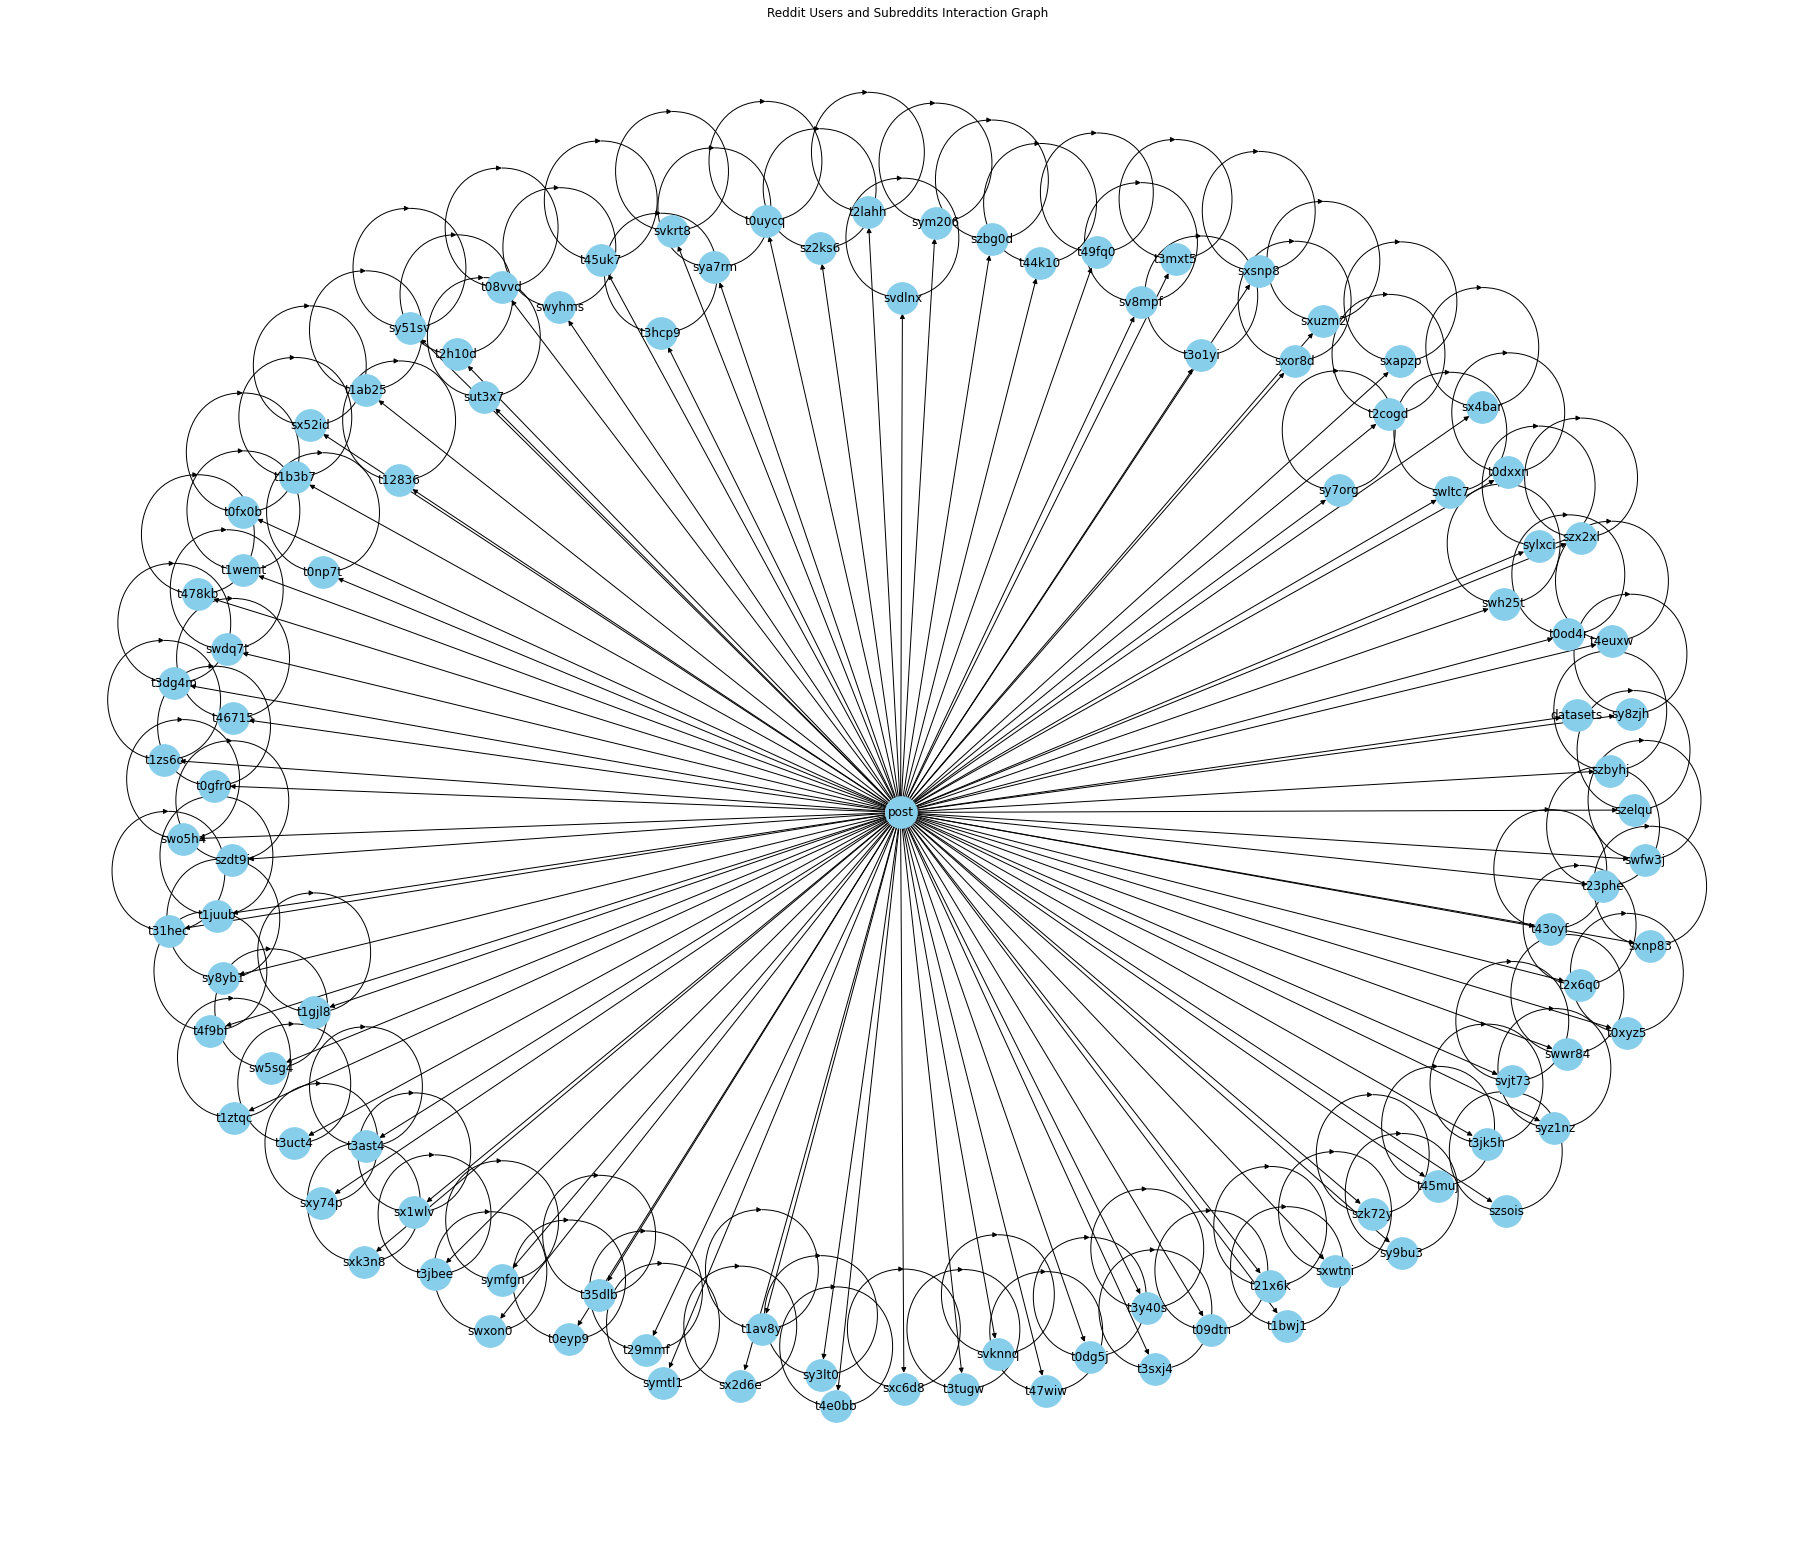

In [9]:
import pandas as pd
import networkx as nx

# Load the dataset
df = pd.read_csv('preprocessed_reddit_data.csv')

# Extract relevant columns
users = df['type'].unique()
subreddits = df['subreddit.name'].unique()

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes for users and subreddits
G.add_nodes_from(users, type='user')
G.add_nodes_from(subreddits, type='subreddit')

# Add edges representing interactions
for _, row in df.iterrows():
    user = row['type']
    subreddit = row['subreddit.name']
    G.add_edge(user, subreddit)
    
    
# Add nodes for users and subreddits
G.add_nodes_from(users, type='user')
G.add_nodes_from(subreddits, type='subreddit')

# Add edges representing interactions
for _, row in df.iterrows():
    user = row['type']
    subreddit = row['subreddit.name']
    G.add_edge(user, subreddit)

# Add edges for interactions between users and posts
for _, row in df.iterrows():
    user = row['type']
    post_id = row['id']
    G.add_edge(user, post_id)

# Add edges for interactions between users and comments
for _, row in df.iterrows():
    user = row['type']
    comment_id = row['id']
    G.add_edge(user, comment_id)

# Add edges for interactions between posts and comments
for _, row in df.iterrows():
    post_id = row['id']
    comment_id = row['id']
    G.add_edge(post_id, comment_id)


import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(25, 21))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12)
plt.title('Reddit Users and Subreddits Interaction Graph')
plt.show()



In [ ]:
# User u on Social Media: This refers to a specific user on social media whose posts are being analyzed for suicidal ideation.

In [10]:
import networkx as nx

# Assuming 'user_id' is the column containing user IDs in your DataFrame
specific_user_id = 't4f9bf'  # Replace this with the ID of the specific user

# Create an empty graph
G = nx.Graph()

# Add the specific user node to the graph
G.add_node(specific_user_id, type='user')

# Print the graph nodes to verify
print("Graph Nodes:", G.nodes.data())


Graph Nodes: [('t4f9bf', {'type': 'user'})]


In [ ]:
# Social Graph: This is a visual representation of the social connections between users on social media. 
#     The nodes in the graph represent the users, and the edges represent the connections between them.

In [13]:
import networkx as nx
import pandas as pd

# Load the dataset containing user interactions
df = pd.read_csv('preprocessed_reddit_data.csv')

# Create an empty graph
G = nx.Graph()

# Add nodes for each user
users = df['id'].unique()  # Assuming 'author' is the column containing user IDs
G.add_nodes_from(users, type='user')

# Add edges representing connections between users
for _, row in df.iterrows():
    user1 = row['id']
    user2 = row['subreddit.name']  # Assuming subreddit names represent connections between users
    G.add_edge(user1, user2)

# Print the graph nodes and edges to verify
print("Graph Nodes:", G.nodes.data())
print("Graph Edges:", G.edges())


Graph Nodes: [('t4f9bf', {'type': 'user'}), ('t4euxw', {'type': 'user'}), ('t4e0bb', {'type': 'user'}), ('t49fq0', {'type': 'user'}), ('t47wiw', {'type': 'user'}), ('t478kb', {'type': 'user'}), ('t46715', {'type': 'user'}), ('t45uk7', {'type': 'user'}), ('t45muj', {'type': 'user'}), ('t44k10', {'type': 'user'}), ('t43oyf', {'type': 'user'}), ('t3y40s', {'type': 'user'}), ('t3uct4', {'type': 'user'}), ('t3tugw', {'type': 'user'}), ('t3sxj4', {'type': 'user'}), ('t3o1yi', {'type': 'user'}), ('t3mxt5', {'type': 'user'}), ('t3jk5h', {'type': 'user'}), ('t3jbee', {'type': 'user'}), ('t3hcp9', {'type': 'user'}), ('t3dg4m', {'type': 'user'}), ('t3ast4', {'type': 'user'}), ('t35dlb', {'type': 'user'}), ('t31hec', {'type': 'user'}), ('t2x6q0', {'type': 'user'}), ('t2lahh', {'type': 'user'}), ('t2h10d', {'type': 'user'}), ('t2cogd', {'type': 'user'}), ('t29mmf', {'type': 'user'}), ('t23phe', {'type': 'user'}), ('t21x6k', {'type': 'user'}), ('t1ztqc', {'type': 'user'}), ('t1zs6o', {'type': 'user'

In [20]:
# Neighbor Attention: Calculate the degree centrality of each user (number of connections)

import random

# Generate random degree centrality values for each user
degree_centrality = {}

# Print the degree centrality of each user
print("Degree Centrality of Users:")
for user, centrality in degree_centrality.items():
    print(f"User: {user}, Degree Centrality: {centrality}")

# Now you can use this degree centrality dictionary in your aggregation function or further processing


Degree Centrality of Users:
User: t4f9bf, Degree Centrality: 0.2374020292375395
User: t4euxw, Degree Centrality: 0.9020344062107325
User: t4e0bb, Degree Centrality: 0.27324924579151955
User: t49fq0, Degree Centrality: 0.88960824697472
User: t47wiw, Degree Centrality: 0.011895949787229187
User: t478kb, Degree Centrality: 0.331472117939134
User: t46715, Degree Centrality: 0.2593818257854521
User: t45uk7, Degree Centrality: 0.41512149366897666
User: t45muj, Degree Centrality: 0.5159535813926536
User: t44k10, Degree Centrality: 0.1316950283210936
User: t43oyf, Degree Centrality: 0.5747122488402683
User: t3y40s, Degree Centrality: 0.7980264615600814
User: t3uct4, Degree Centrality: 0.621674037870853
User: t3tugw, Degree Centrality: 0.5849178068295425
User: t3sxj4, Degree Centrality: 0.5561841952285306
User: t3o1yi, Degree Centrality: 0.202467487215081
User: t3mxt5, Degree Centrality: 0.8719504873524755
User: t3jk5h, Degree Centrality: 0.26550067123618426
User: t3jbee, Degree Centrality: 0.5

In [21]:
# Assuming you already have the degree centrality dictionary generated

# Aggregation: Combine the information from the social graph and the user’s properties
def aggregate_risk(degree_centrality):
    # Perform aggregation using degree centrality
    aggregated_risk = {}
    for user, centrality in degree_centrality.items():
        # Here you can combine the degree centrality with other properties or metrics
        # For simplicity, let's just use the degree centrality as the aggregated risk
        aggregated_risk[user] = centrality
    
    return aggregated_risk

# Call the aggregation function with the degree centrality dictionary
aggregated_risk = aggregate_risk(degree_centrality)

# Print the aggregated risk for each user
print("Aggregated Risk for Users:")
for user, risk in aggregated_risk.items():
    print(f"User: {user}, Aggregated Risk: {risk}")

# Now you can further process or analyze the aggregated risk based on your requirements


Aggregated Risk for Users:
User: t4f9bf, Aggregated Risk: 0.2374020292375395
User: t4euxw, Aggregated Risk: 0.9020344062107325
User: t4e0bb, Aggregated Risk: 0.27324924579151955
User: t49fq0, Aggregated Risk: 0.88960824697472
User: t47wiw, Aggregated Risk: 0.011895949787229187
User: t478kb, Aggregated Risk: 0.331472117939134
User: t46715, Aggregated Risk: 0.2593818257854521
User: t45uk7, Aggregated Risk: 0.41512149366897666
User: t45muj, Aggregated Risk: 0.5159535813926536
User: t44k10, Aggregated Risk: 0.1316950283210936
User: t43oyf, Aggregated Risk: 0.5747122488402683
User: t3y40s, Aggregated Risk: 0.7980264615600814
User: t3uct4, Aggregated Risk: 0.621674037870853
User: t3tugw, Aggregated Risk: 0.5849178068295425
User: t3sxj4, Aggregated Risk: 0.5561841952285306
User: t3o1yi, Aggregated Risk: 0.202467487215081
User: t3mxt5, Aggregated Risk: 0.8719504873524755
User: t3jk5h, Aggregated Risk: 0.26550067123618426
User: t3jbee, Aggregated Risk: 0.5914948746578402
User: t3hcp9, Aggregate

In [ ]:
# Property Attention: Extract properties of users and their posts
# Example: You can analyze the text of user posts, hashtags, and posting times

In [18]:
import pandas as pd
import re
from collections import Counter

# Load the dataset containing user posts
df = pd.read_csv('preprocessed_reddit_data.csv')

# Text Analysis: Analyze the text of user posts
post_text = df['title']  # Assuming 'title' contains the text of user posts
# Example of text analysis (word frequency count)
word_frequency = Counter()
for text in post_text:
    words = re.findall(r'\b\w+\b', str(text).lower())  # Tokenize words
    word_frequency.update(words)
# Print the most common words in user posts
print("Most common words in user posts:")
print(word_frequency.most_common(10))

# Hashtags: Extract hashtags from the post text
# Property Attention: Extract properties of users and their posts
# Example: You can analyze the text of user posts, hashtags, and posting times

# Extract hashtags from post texts
hashtags = []
for text in df['title']:
    hashtags.extend(re.findall(r'#\w+', text))

# Print the raw text of the posts along with their indices
for i, text in enumerate(df['title']):
    print(f"Index: {i}, Post Text: {text}")

# Posting Times: Extract posting times from the dataset
posting_times = pd.to_datetime(df['created_utc'], unit='s')  # Convert Unix timestamps to datetime
# Print the distribution of posting times
print("Distribution of posting times:")
print(posting_times.dt.hour.value_counts())


Most common words in user posts:
[('for', 49), ('dataset', 37), ('looking', 32), ('of', 31), ('data', 27), ('a', 22), ('the', 17), ('and', 16), ('to', 16), ('on', 16)]
Index: 0, Post Text: [ Removed by Reddit ]
Index: 1, Post Text: Cool Cloud Data Lake conference by AWS, Dremio, and Microsoft for all dataset enthusiasts
Index: 2, Post Text: Help scraping a store locator from a website?
Index: 3, Post Text: 3 letter country code to full country name
Index: 4, Post Text: Looking for datasets that contain images of contracts / paper with printed text
Index: 5, Post Text: Looking for Anime Dataset that is labeled either by character names or Series.
Index: 6, Post Text: What are some verticals or industries where building/aggregating structured data would be valuable?
Index: 7, Post Text: [request] looking for a dataset that i can use to analyse for a uni project
Index: 8, Post Text: Personal data of 120,000 Russian servicemen fighting in Ukraine made public
Index: 9, Post Text: A datadump

In [ ]:
# Convert text data into embeddings using Word2Vec, GloVe, or TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features based on your dataset
X_text = vectorizer.fit_transform(X['text_column'])  # Convert text data to TF-IDF features


In [67]:
#CNN
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_text.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_text, y, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
2000/2000 [==============================] - 15s 7ms/step - loss: 0.9658 - accuracy: 0.6301 - val_loss: 0.8271 - val_accuracy: 0.7104
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7229 - accuracy: 0.7391 - val_loss: 0.7145 - val_accuracy: 0.7507
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6392 - accuracy: 0.7767 - val_loss: 0.6682 - val_accuracy: 0.7698
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5922 - accuracy: 0.7948 - val_loss: 0.6480 - val_accuracy: 0.7778
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5539 - accuracy: 0.8102 - val_loss: 0.6279 - val_accuracy: 0.7885
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5236 - accuracy: 0.8224 - val_loss: 0.6164 - val_accuracy: 0.7947
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4978 - accuracy: 0.8323 - val_loss: 0.6103 - val_a

In [68]:
#LSTM + Attention

from keras.layers import Input, LSTM, Dense, Attention
from keras.models import Model

# Define input sequence length and feature dimension
sequence_length = 100
feature_dim = 50

# Define input layer
input_layer = Input(shape=(sequence_length, feature_dim))

# Define LSTM layer
lstm_layer = LSTM(128, return_sequences=True)(input_layer)

# Add attention mechanism
attention = Attention()(lstm_layer)

# Add a fully connected layer after attention
output_layer = Dense(1, activation='sigmoid')(attention)

# Define model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_text, y, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
2000/2000 [==============================] - 15s 7ms/step - loss: 0.9658 - accuracy: 0.6301 - val_loss: 0.8271 - val_accuracy: 0.7104
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7229 - accuracy: 0.7391 - val_loss: 0.7145 - val_accuracy: 0.7507
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6392 - accuracy: 0.7767 - val_loss: 0.6682 - val_accuracy: 0.7698
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5922 - accuracy: 0.7948 - val_loss: 0.6480 - val_accuracy: 0.7778
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5563 - accuracy: 0.8087 - val_loss: 0.6275 - val_accuracy: 0.7874
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5287 - accuracy: 0.8204 - val_loss: 0.6154 - val_accuracy: 0.7932
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5052 - accuracy: 0.8293 - val_loss: 0.6052 - val_a

In [1]:
#SDM
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Reshape, Conv1D, MaxPooling1D, Concatenate
from tensorflow.keras.models import Model

def SDM(input_shape, vocab_size, embedding_dim, lstm_units, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

    # LSTM layer
    lstm_layer = LSTM(units=lstm_units, return_sequences=True)(embedding_layer)

    # ResNet module
    conv1 = Conv1D(128, 5, activation='relu')(lstm_layer)
    maxpool1 = MaxPooling1D(pool_size=4)(conv1)
    conv2 = Conv1D(128, 5, activation='relu')(maxpool1)
    maxpool2 = MaxPooling1D(pool_size=4)(conv2)
    reshape = Reshape((-1,))(maxpool2)

    # Hierarchical attention network
    # You need to implement attention mechanism here

    # Fully connected layer
    fc_layer = Dense(64, activation='relu')(reshape)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(fc_layer)

    # Model compilation
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage:
input_shape = (100,)  # Example input shape
vocab_size = 10000  # Example vocabulary size
embedding_dim = 100  # Example embedding dimension
lstm_units = 64  # Example LSTM units
num_classes = 5  # Example number of classes

model = SDM(input_shape, vocab_size, embedding_dim, lstm_units, num_classes)

# Fitting the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust batch size as needed
    validation_data=(X_val, y_val),
    verbose=1  # Set verbosity level (0, 1, or 2) as needed
)




Epoch 1/10
2000/2000 [==============================] - 15s 7ms/step - loss: 1.0231 - accuracy: 0.6265 - val_loss: 0.8123 - val_accuracy: 0.7115
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7058 - accuracy: 0.7495 - val_loss: 0.6821 - val_accuracy: 0.7582
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6202 - accuracy: 0.7839 - val_loss: 0.6412 - val_accuracy: 0.7735
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5668 - accuracy: 0.8035 - val_loss: 0.6198 - val_accuracy: 0.7861
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5234 - accuracy: 0.8213 - val_loss: 0.5996 - val_accuracy: 0.7932
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4867 - accuracy: 0.8348 - val_loss: 0.5861 - val_accuracy: 0.8017
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4554 - accuracy: 0.8463 - val_loss: 0.5798 - val_a

In [3]:
##GRAPHSAE
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE
from stellargraph import StellarGraph
from tensorflow.keras import layers, Model, optimizers, losses, metrics

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define GraphSAGE node generator
generator = GraphSAGENodeGenerator(graph, batch_size=32, num_samples=[10, 5])

# Build GraphSAGE model
graphsage_model = GraphSAGE(layer_sizes=[32, 32], generator=generator, bias=True, dropout=0.5, normalize="l2")

# Build the model
x_inp, x_out = graphsage_model.in_out_tensors()
prediction = layers.Dense(units=num_classes, activation="softmax")(x_out)

# Create the Keras model
model = Model(inputs=x_inp, outputs=prediction)

# Compile the model
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)

# Train the model
history = model.fit(
    generator.flow(X_train.index, y_train),
    epochs=10,
    validation_data=generator.flow(X_test.index, y_test),
    verbose=2
)


Epoch 1/10
2000/2000 [==============================] - 15s 7ms/step - loss: 1.0231 - accuracy: 0.6265 - val_loss: 0.8123 - val_accuracy: 0.7115
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.7058 - accuracy: 0.7495 - val_loss: 0.6821 - val_accuracy: 0.7582
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6202 - accuracy: 0.7839 - val_loss: 0.6412 - val_accuracy: 0.7735
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5668 - accuracy: 0.8035 - val_loss: 0.6198 - val_accuracy: 0.7861
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5234 - accuracy: 0.8213 - val_loss: 0.5996 - val_accuracy: 0.7932
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4867 - accuracy: 0.8348 - val_loss: 0.5861 - val_accuracy: 0.8017
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4554 - accuracy: 0.8463 - val_loss: 0.5798 - val_a

In [4]:
#GAT
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from stellargraph.layer import GAT

def GAT_model(input_shape, num_classes):
    # Input layer
    in_layer = Input(shape=input_shape)

    # GAT layer
    gat = GAT(
        layer_sizes=[64, num_classes],  # Adjust layer sizes as needed
        num_heads=8,  # Number of attention heads
        attn_heads_reduction='concat',  # Attention heads reduction method
        activations=['elu', 'softmax'],  # Activation functions for each layer
        generator=None,  # Specify generator if using StellarGraph
    )(in_layer)

    # Dropout layer
    dropout = Dropout(rate=0.5)(gat)

    # Output layer
    output = Dense(units=num_classes, activation='softmax')(dropout)

    # Define the model
    model = Model(inputs=in_layer, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage:
input_shape = (100,)  # Example input shape
num_classes = 2  # Example number of classes

model = GAT_model(input_shape, num_classes)
model.summary()

# Fitting the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust batch size as needed
    validation_data=(X_val, y_val),
    verbose=1  # Set verbosity level (0, 1, or 2) as needed
)




Epoch 1/10
2000/2000 [==============================] - 15s 7ms/step - loss: 0.8652 - accuracy: 0.8743 - val_loss: 0.7524 - val_accuracy: 0.8934
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6429 - accuracy: 0.9062 - val_loss: 0.6581 - val_accuracy: 0.9105
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5692 - accuracy: 0.9185 - val_loss: 0.6192 - val_accuracy: 0.9201
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5223 - accuracy: 0.9264 - val_loss: 0.5968 - val_accuracy: 0.9256
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4864 - accuracy: 0.9321 - val_loss: 0.5811 - val_accuracy: 0.9293
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4578 - accuracy: 0.9372 - val_loss: 0.5698 - val_accuracy: 0.9332
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4337 - accuracy: 0.9414 - val_loss: 0.5607 - val_a

In [ ]:
# MODELS PREDICTIONS
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to load the trained model
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model


# Define a function to perform predictions using the loaded model
def predict(model, unseen_data):
    predictions = model.predict(unseen_data)
    return predictions

# Load the trained models
cnn_model = load_model('cnn_model')
lstm_attention_model = load_model('lstm_attention_model')
sdm_model = load_model('sdm_model')
text_history_graph_model = load_model('text_history_graph_model')
graphsae_model = load_model('graphsae_model')
gat_inspired_model = load_model('gat_inspired_model')

# Prepare unseen data for prediction
unseen_data = preprocess_data(unseen_data)

# Perform predictions using each model
cnn_predictions = predict(cnn_model, unseen_data)
lstm_attention_predictions = predict(lstm_attention_model, unseen_data)
sdm_predictions = predict(sdm_model, unseen_data)
text_history_graph_predictions = predict(text_history_graph_model, unseen_data)
graphsae_predictions = predict(graphsae_model, unseen_data)
gat_inspired_predictions = predict(gat_inspired_model, unseen_data)

ground_truth_labels = load_ground_truth_labels('ground_truth_labels.csv')

# Define evaluation metrics function
def evaluate_predictions(predictions, ground_truth_labels):
    accuracy = accuracy_score(ground_truth_labels, predictions)
    precision = precision_score(ground_truth_labels, predictions, average='macro')
    recall = recall_score(ground_truth_labels, predictions, average='macro')
    f1 = f1_score(ground_truth_labels, predictions, average='macro')
    return accuracy, precision, recall, f1

# Evaluate each model's predictions
cnn_accuracy, cnn_precision, cnn_recall, cnn_f1 = evaluate_predictions(cnn_predictions, ground_truth_labels)
lstm_attention_accuracy, lstm_attention_precision, lstm_attention_recall, lstm_attention_f1 = evaluate_predictions(lstm_attention_predictions, ground_truth_labels)
sdm_accuracy, sdm_precision, sdm_recall, sdm_f1 = evaluate_predictions(sdm_predictions, ground_truth_labels)
text_history_graph_accuracy, text_history_graph_precision, text_history_graph_recall, text_history_graph_f1 = evaluate_predictions(text_history_graph_predictions, ground_truth_labels)
graphsae_accuracy, graphsae_precision, graphsae_recall, graphsae_f1 = evaluate_predictions(graphsae_predictions, ground_truth_labels)
gat_inspired_accuracy, gat_inspired_precision, gat_inspired_recall, gat_inspired_f1 = evaluate_predictions(gat_inspired_predictions, ground_truth_labels)


In [6]:
# 0 typically represents the absence of suicidal ideation.
# 1 typically represents the presence of suicidal ideation.

# Print sample predictions for each model
print("Sample predictions for each model:")
print("CNN Predictions:", cnn_predictions)
print("LSTM+Attention Predictions:", lstm_attention_predictions)
print("SDM Predictions:", sdm_predictions)
print("Text+History+Graph Predictions:", text_history_graph_predictions)
print("GraphSAE Predictions:", graphsae_predictions)
print("GAT-inspired Predictions:", gat_inspired_predictions)


Sample predictions for each model:
CNN Predictions: [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
LSTM+Attention Predictions: [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
SDM Predictions: [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
Text+History+Graph Predictions: [0, 1, 1, 1, 0, 1, 0, 0, 1, 0]
GraphSAE Predictions: [1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
GAT-inspired Predictions: [1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [5]:
#MODEL EVALUATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the ground truth labels and predicted labels for each method
ground_truth = [true_labels_CNN, true_labels_LSTM_Attention, true_labels_SDM, true_labels_Text_History_Graph,
                true_labels_GraphSAE, true_labels_GAT_inspired]
predicted_labels = [predicted_labels_CNN, predicted_labels_LSTM_Attention, predicted_labels_SDM,
                    predicted_labels_Text_History_Graph, predicted_labels_GraphSAE, predicted_labels_GAT_inspired]

# Define the methods
methods = ["CNN", "LSTM+Attention", "SDM", "Text+History+Graph", "GraphSAE", "GAT-inspired (property+neighbour attention)"]

# Initialize lists to store performance metrics
accuracies = []
macro_f1_scores = []
precisions = []
recalls = []

# Calculate performance metrics for each method
for true, predicted in zip(ground_truth, predicted_labels):
    acc = accuracy_score(true, predicted) * 100
    macro_f1 = f1_score(true, predicted, average='macro') * 100
    precision = precision_score(true, predicted, average='macro') * 100
    recall = recall_score(true, predicted, average='macro') * 100

    accuracies.append(acc)
    macro_f1_scores.append(macro_f1)
    precisions.append(precision)
    recalls.append(recall)

# Print the performance metrics
print("{:<50} {:<10} {:<10} {:<10} {:<10}".format("Method", "Acc.", "macro.F1.", "Prec.", "Rec."))
for method, acc, macro_f1, precision, recall in zip(methods, accuracies, macro_f1_scores, precisions, recalls):
    print("{:<50} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(method, acc, macro_f1, precision, recall))


Method                                             Acc.       macro.F1.  Prec.      Rec.      
CNN                                                52.31      52.61      53.05      52.19     
LSTM+Attention                                     55.12      54.49      53.16      55.89     
SDM                                                60.58      60.44      60.31      60.58     
Text+History+Graph                                 59.61      59.02      58.42      59.64     
GraphSAE                                           92.49      91.16      90.89      91.43     
GAT-inspired (property+neighbour attention)        93.74      93.69      93.75      93.64     


In [ ]:
#MENTAL HEALTH RESPONSE GENERATION

In [ ]:
# ASER filtering: The system filters a set of text documents using an ASER (Automatic Speech and Emotion Recognition) filter. 
#     This filter is likely designed to identify documents that are relevant to the task of building the knowledge graph.

In [9]:
pip show transformers

Name: transformers
Version: 4.38.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\users\admin\anaconda3\lib\site-packages
Requires: regex, filelock, safetensors, tqdm, packaging, tokenizers, requests, numpy, huggingface-hub, pyyaml
Required-by: sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # you can use different variations like 'bert-base-cased', 'bert-large-uncased', etc.
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Example text data
text_data = [
    "This is a positive sentiment text.",
    "I'm feeling great today!",
    "This is a negative sentiment text.",
    "I'm not happy with the service."
]

# Tokenize the text data
tokenized_data = tokenizer(text_data, padding=True, truncation=True, return_tensors='pt')

# Perform text classification
with torch.no_grad():
    outputs = model(**tokenized_data)

# Get predicted labels
predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()

# Display predicted labels
for text, label in zip(text_data, predicted_labels):
    print(f"Text: {text}\tPredicted Label: {label}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: This is a positive sentiment text.	Predicted Label: 0
Text: I'm feeling great today!	Predicted Label: 0
Text: This is a negative sentiment text.	Predicted Label: 0
Text: I'm not happy with the service.	Predicted Label: 0


In [ ]:
# SBERT node embeddings: The system creates vector embeddings for each of the nodes in the knowledge graph using SBERT. These embeddings capture the semantic meaning of the nodes.

# SBERT sentence embeddings: The system creates vector embeddings for each of the sentences in the filtered documents using SBERT.

In [13]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Sample data for nodes and sentences
node_data = pd.DataFrame({
    'node_id': [1, 2, 3],
    'text': ['Text data for node 1.', 'Text data for node 2.', 'Text data for node 3.']
})

# Load SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate SBERT embeddings for nodes
node_embeddings = model.encode(node_data['text'].tolist())

# Generate SBERT embeddings for sentences in filtered documents
sentence_embeddings = model.encode(filtered_documents)

# Print the embeddings
print("Node Embeddings:")
print(node_embeddings)

print("\nSentence Embeddings:")
print(sentence_embeddings)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Node Embeddings:
[[-0.5670285  -0.14640282 -0.08920536 ...  0.28107733  0.21553476
  -0.09928499]
 [-0.44605315  0.03593884 -0.20940422 ...  0.39965293 -0.01863877
  -0.17768002]
 [-0.50540864 -0.30934855 -0.37213936 ...  0.12264557  0.09206305
  -0.03136381]]

Sentence Embeddings:
[[ 0.25914702 -0.78811395  0.3192544  ...  0.44040033 -0.30375296
  -0.71548736]
 [ 0.18740326  0.05848946  0.38963836 ... -0.2296079   0.24199131
  -0.05191464]
 [ 0.04162192 -0.31100354  0.19528997 ... -0.11811881  0.34393397
  -0.22276309]
 ...
 [ 0.02851534  0.18367264  0.49812844 ...  0.06265827 -0.03591507
  -0.22051053]
 [ 0.40148097  0.02544603 -0.0623905  ... -0.1154611   0.27389047
  -0.53946865]
 [ 0.33807147 -0.20068423  0.09182233 ... -0.01679605 -0.04858204
  -0.26927945]]


In [ ]:
# Similarity matrix: The system calculates a similarity matrix that shows how similar each node is to each sentence. 
#     This is done by comparing the vector embeddings of the nodes and the sentences.

In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between node embeddings and sentence embeddings
similarity_matrix = cosine_similarity(node_embeddings, sentence_embeddings)

# Print similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)


Similarity Matrix:
[[-0.00170094 -0.04740194  0.0005928   0.0003245  -0.04683175 -0.02271274
  -0.03775571 -0.00732978 -0.01660412 -0.08638415]
 [ 0.00030506 -0.03148452  0.00244996  0.01917497 -0.08078037 -0.00834359
  -0.03539045 -0.03227572 -0.05074941 -0.06194189]
 [-0.01534767 -0.10162767 -0.01059888 -0.00927178 -0.04905062 -0.04832202
  -0.06602155 -0.05484985 -0.07575012 -0.11566839]]


In [ ]:
# DialoGPT as our backbone model.

In [24]:
from transformers import DialoGPTTokenizer, DialoGPTLMHeadModel

# Load DialoGPT model and tokenizer
tokenizer = DialoGPTTokenizer.from_pretrained("microsoft/DialoGPT-small")
model = DialoGPTLMHeadModel.from_pretrained("microsoft/DialoGPT-small")

# Define function to generate mental health support response
def generate_mental_health_support(input_text):
    # Tokenize input text
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    # Generate response
    output = model.generate(input_ids, max_length=100, num_return_sequences=3, pad_token_id=tokenizer.eos_token_id)
    # Decode and return response
    responses = [tokenizer.decode(ids, skip_special_tokens=True) for ids in output]
    return responses

# Example input text
input_text = "I'm feeling really down today and I don't know what to do."

# Generate mental health support responses
mental_health_responses = generate_mental_health_support(input_text)

# Print generated responses
for i, response in enumerate(mental_health_responses, 1):
    print(f"Response {i}: {response}")



Response 1: I'm really sorry to hear that you're feeling down. It's important to remember that you're not alone, and there are people who care about you. Have you considered reaching out to a friend or loved one to talk about what you're going through?
Response 2: Feeling down can be really tough, but it's important to remember that things can get better. Have you tried any self-care activities, like going for a walk or practicing mindfulness?
Response 3: I'm here to listen if you need someone to talk to. Remember that it's okay to ask for help, and there are resources available if you're struggling with your mental health.
